# vllm
vLLM的吞吐量比HuggingFace Transformers（HF）高14x-24倍，比HuggingFace Text Generation Inference（TGI）高2.2x-2.5倍

## 离线批量处理

In [ ]:
# pip install vllm
from vllm import LLM, SamplingParams


prompts = [
    "Funniest joke ever:",
    "The capital of France is",
    "The future of AI is",
]
sampling_params = SamplingParams(temperature=0.95, top_p=0.95, max_tokens=200)
llm = LLM(model="huggyllama/llama-13b")
outputs = llm.generate(prompts, sampling_params)

for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

## API服务

```
# Start the server:
python -m vllm.entrypoints.api_server --env MODEL_NAME=huggyllama/llama-13b

# Query the model in shell:
curl http://localhost:8000/generate \
    -d '{
        "prompt": "Funniest joke ever:",
        "n": 1,
        "temperature": 0.95,
        "max_tokens": 200
    }'
```

In [ ]:
!python -m vllm.entrypoints.openai.api_server --model /data/coding/model/Shanghai_AI_Laboratory/internlm2-chat-20b  --served-model-name Qwen2-7B-Instruct-lora --max-model-len=2048 --trust-remote-code --dtype=half

In [ ]:
 # vllm_openai_completions.py
from openai import OpenAI
client = OpenAI(
    base_url="http://localhost:8000/v1",
    api_key="sk-xxx", # 随便填写，只是为了通过接口参数校验
)

In [ ]:
import json

# 批处理函数
def baseline_model(tasks):
    with open("submit.json", "w") as file:
        for task in tasks:
            messages = [
                {"role": "system", "content": "你是一个熟读各类小说的专家，请你根据要求写一段800字左右的小说。"},
                {"role": "user", "content": task}
            ]
            
            for n in range(50):
                completion = client.chat.completions.create(
                    model="Qwen2-7B-Instruct-lora",
                    messages=messages
                )
                response = completion.choices[0].message.content
                data = {
                    "instruction":"你是一个熟读各类小说的专家，请你根据要求写一段800字左右的小说。",
                    "input":task,
                    "output":response,
                }
                file.write(json.dumps(data, ensure_ascii=False) + "\n")
    return "推理完成"

In [ ]:
res_novel = baseline_model(stories)

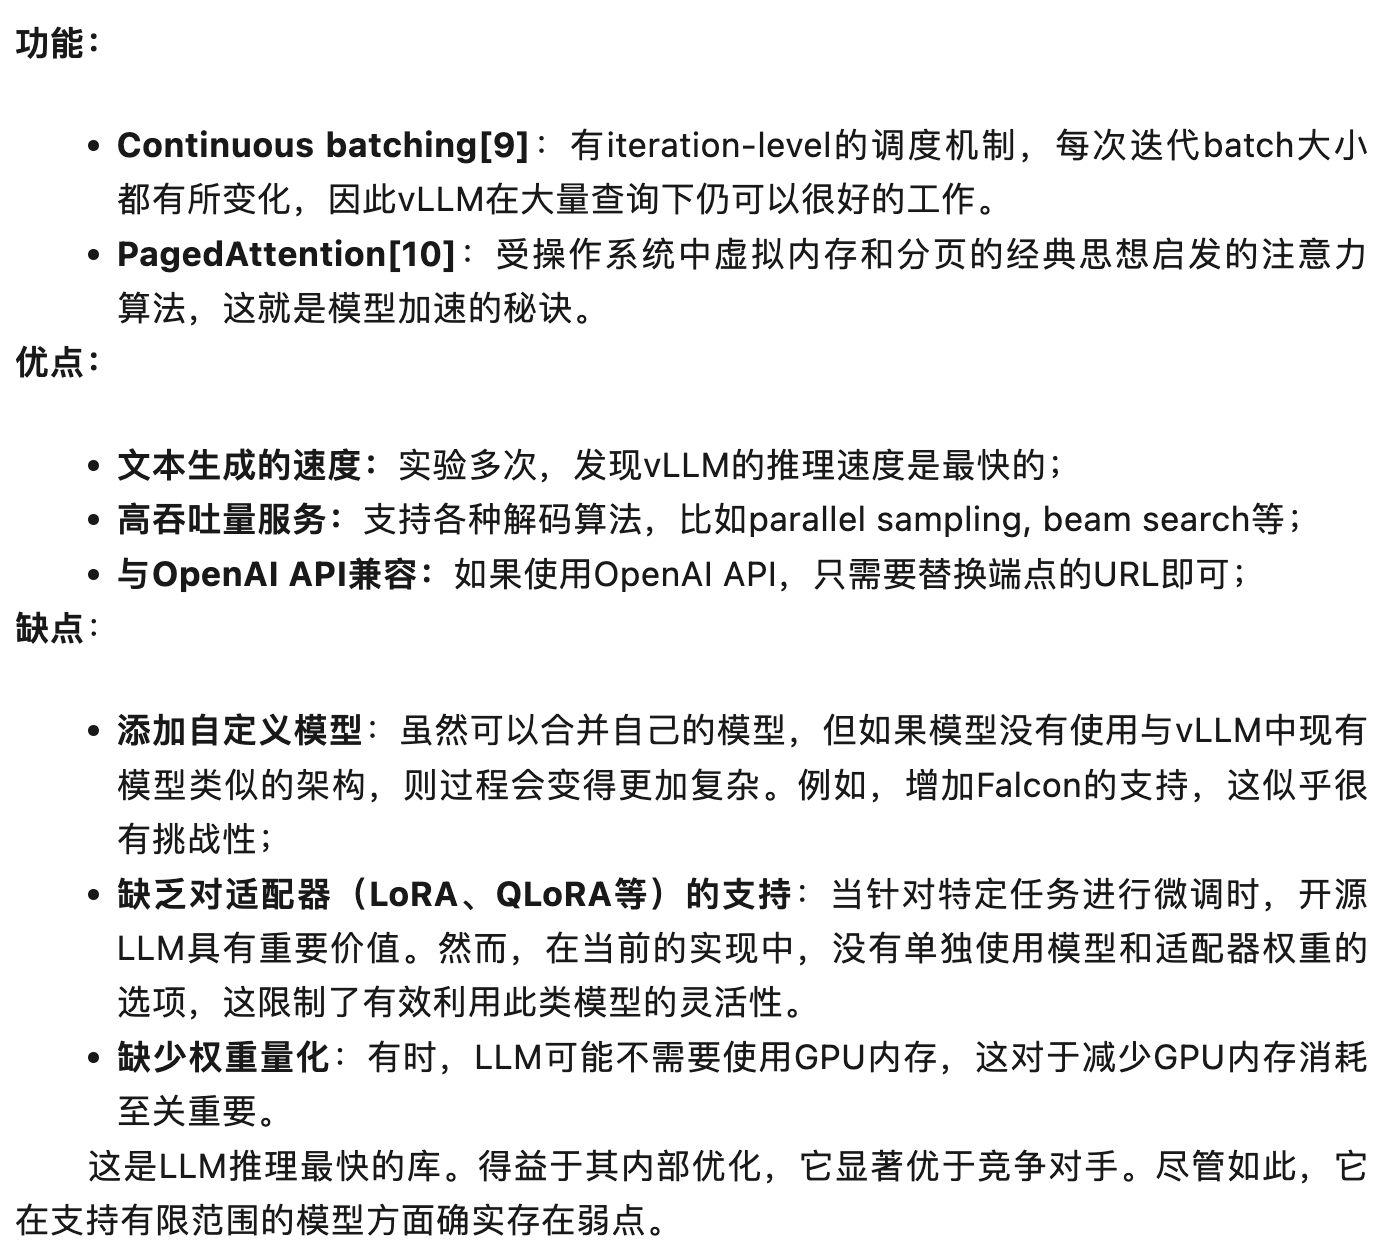

使用vLLM的开发路线可以参考：https://github.com/vllm-project/vllm/issues/244